In [1]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt

In [2]:
xs_train, ys_train = datasets.load_svmlight_file('./a9a.csv', n_features=123)
xs_val, ys_val = datasets.load_svmlight_file('./a9a_t.csv', n_features=123)

xs_train = xs_train.A # numpy
xs_val = xs_val.A

xs_train = np.c_[xs_train, np.ones(len(xs_train))]
xs_val = np.c_[xs_val, np.ones(len(xs_val))]

In [3]:
alpha = 0.5 # (0, 1)

def getLoss(xs, ys):
    loss = 0
    grad = 0
    for x, y in zip(xs, ys):
        arg = 1 - y * W.T.dot(x)[0]
        loss += np.maximum(0, arg)
        grad += 0 if arg < 0 else y * x
        
    loss += alpha * np.linalg.norm(W.reshape((-1, 1))) / 2
    loss /= len(xs)

    grad = 2 * alpha * W - grad.reshape(-1, 1)
    grad /= len(xs)
    
    return loss, grad

# 准确率
def getAcc(xs, ys):
    acc = 0
    for x, y in zip(xs, ys):
        y_calc = W.T.dot(x)
        y_calc = 1 if y_calc >= 0 else -1 # 阈值
        if (y == y_calc):
            acc += 1 
    acc /= len(xs)
    return acc

SVM Hinge 损失函数：
$$
\hat{y_i} = W^Tx_i \\
Loss = \sum_{i = 0}^{\#x}[\max(0, 1 - y_i\hat{y_i})] + \lambda\|W\|^2_2 \\
\frac {\partial Loss} {\partial W} = 2 \lambda W - \sum_{i = 0}^{\#x}(1 - y_i\hat{y_i} > 0 \;?\; y_i * x_i : 0) \\
\lambda := \frac{1}{2C}\in(0, 1)\;(C>0\;为惩罚参数，越大惩罚越大)
$$

In [4]:
W = np.random.random([124, 1])
lr = 1e-3

losses_train, losses_val = [], []
acc_val = []

show_epoch = 10 # 显示
batch_size = 100 # 批次大小

epoches = 200
batches = len(xs_train) // batch_size

for epoch in range(epoches):
    for batch in range(batches):
        s = batch * batch_size
        e = s + batch_size
        
        loss_train, grad = getLoss(xs_train[s:e], ys_train[s:e])
        W = W - lr * grad # SGD
        
    loss_val, _ = getLoss(xs_val, ys_val)
    losses_train.append(loss_train)    
    losses_val.append(loss_val)
    
    acc = getAcc(xs_val, ys_val)
    acc_val.append(acc)
    
    if epoch % show_epoch == 0:
        print("epoch: ", epoch, "loss_train: ", loss_train, " loss_val: ", loss_val, "acc_val: ", acc)

epoch:  0 loss_train:  5.974567450091555  loss_val:  6.0965427760254425 acc_val:  0.23622627602727106
epoch:  10 loss_train:  1.3261198726940642  loss_val:  1.5207692070808696 acc_val:  0.3977642650942817
epoch:  20 loss_train:  0.574300802989978  loss_val:  0.7201880634172274 acc_val:  0.7110742583379399
epoch:  30 loss_train:  0.5048315105552842  loss_val:  0.6378133286655293 acc_val:  0.7454701799643757
epoch:  40 loss_train:  0.459972811353219  loss_val:  0.5876117029401258 acc_val:  0.7605183956759413
epoch:  50 loss_train:  0.42968486387124144  loss_val:  0.5515533784623222 acc_val:  0.7718813340703888
epoch:  60 loss_train:  0.40980109884736643  loss_val:  0.5248037302066604 acc_val:  0.7809716847859468
epoch:  70 loss_train:  0.3950309323671732  loss_val:  0.503956186718182 acc_val:  0.7879737116884712
epoch:  80 loss_train:  0.3856214875452712  loss_val:  0.4870631331584473 acc_val:  0.7949757385909957
epoch:  90 loss_train:  0.37820755849070964  loss_val:  0.47297018499829147

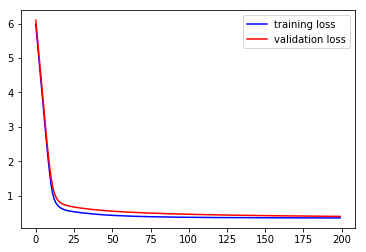

In [5]:
plt.plot([i for i in range(len(losses_train))], losses_train, 'b')
plt.plot([i for i in range(len(losses_val))], losses_val, 'r')
plt.legend(["training loss","validation loss"])
plt.savefig('./lab_2_2_1.pdf')
plt.show()

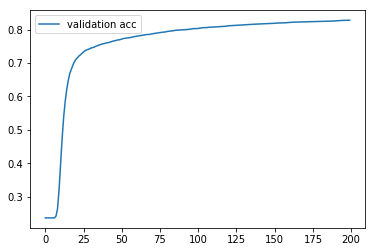

In [7]:
plt.plot([i for i in range(len(acc_val))], acc_val)
plt.legend(["validation acc"])
plt.savefig('./lab_2_2_2.pdf')
plt.show()